#Energy Demand and Utilization: 
##Scaife Hall Lighting Replacement:
This Code is part of the Energy Demans and Utilization class Project. The following have been implemented:
1. Finding the Total Lighting Consumption
2. Finding the Average Daily hrs of Lighting Consumption
3. Producing Interactive Plots of Lighting for the various sensing points

###Importing libraries:

In [65]:
import numpy as np
from datetime import datetime
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

### Setting the path to the directory containg the csv files:

In [3]:
# Data_path = 'The name of the folder where the data-sets are stored'
Data_path = '2015_enfuse/Feb_15/'
%ls $Data_path

2015-02-23.csv* 2015-02-25.csv  2015-02-27.csv* 2015-03-01.csv*
2015-02-24.csv  2015-02-26.csv* 2015-02-28.csv*


In [4]:
csv_files = os.listdir(Data_path)

### Function to Import the data and merge them into a Data-frame:

In [5]:
def get_data(path,filename):
    df=pd.read_csv(path+'/'+filename)  
    return df[['BranchName','BreakerPosition','DateStamp','AvgWatt']]    

In [6]:
frames=[];
for i in csv_files:
    frames.append(get_data(Data_path,i))
merged=pd.concat(frames)

In [7]:
merged.head()

,BranchName,BreakerPosition,DateStamp,AvgWatt
0,Rm 311 Copier,1,2/23/2015 12:00:00 AM,0
1,"Lts. Rm 305, 307",3,2/23/2015 12:00:00 AM,0
2,"Lts. Rm 304, 306 & Hall",5,2/23/2015 12:00:00 AM,0
3,"Lts. 312, 313",6,2/23/2015 12:00:00 AM,60
4,Lts. Rm 318,7,2/23/2015 12:00:00 AM,0


### Creating a column in the frame with the Branch Name and Panel ID for unique sensing points:
This is done since there are common sensing points for different Breaker positions. For example *2nd Floor Lighting* is measured by four different sensing points. Merging the BreakerPositions solves this.





In [8]:
final=[]
def edit_data(final):
    final['timestamp']=pd.to_datetime(final['DateStamp'])
    final['Branch-Panel']= final['BranchName'].str.cat(final['BreakerPosition'].values.astype(str), sep=' - ')
    return final

In [9]:
final=edit_data(merged)

In [10]:
final.head()

,BranchName,BreakerPosition,DateStamp,AvgWatt,timestamp,Branch-Panel
0,Rm 311 Copier,1,2/23/2015 12:00:00 AM,0,2015-02-23,Rm 311 Copier - 1
1,"Lts. Rm 305, 307",3,2/23/2015 12:00:00 AM,0,2015-02-23,"Lts. Rm 305, 307 - 3"
2,"Lts. Rm 304, 306 & Hall",5,2/23/2015 12:00:00 AM,0,2015-02-23,"Lts. Rm 304, 306 & Hall - 5"
3,"Lts. 312, 313",6,2/23/2015 12:00:00 AM,60,2015-02-23,"Lts. 312, 313 - 6"
4,Lts. Rm 318,7,2/23/2015 12:00:00 AM,0,2015-02-23,Lts. Rm 318 - 7


###Separating the points that Sense Light:
These labels have either Lights or Lts. in them after inspecting all the unique labels in the dataset.

In [11]:
u=final['Branch-Panel'].unique()
len(u)

206

In [12]:
k1=np.array([i for i, s in enumerate(u) if 'Lts' in s])
k2=np.array([i for i, s in enumerate(u) if 'Light' in s])
k3=np.hstack((k1,k2))

### List of all the sensing points that measure the Lighting:

In [67]:
u[k3]

array(['Lts. Rm 305, 307 - 3', 'Lts. Rm 304, 306 & Hall - 5',
       'Lts. 312, 313 - 6', 'Lts. Rm 318 - 7', 'Lts. 314, 315 - 8',
       'Lts. Rm 301 - 9', 'Lts Rm 316 - 10', 'Lts Rm 303 - 11',
       "Lts. Women's Rest Rm. - 13", 'Lts. Cor. 319 - 14',
       'Lts. Stairway - 22', 'Lts. Rm 4003, 404 - 1', 'Lts. Rm. 426 - 2',
       'Lts. Rm 402 - 3', 'Lts. Rm 401 - 5', 'Lts. Rm 406 - 7',
       'Lts. Rm 408 - 9', 'Emergency Lts. - 18', 'Restroom Lts. - 23',
       '404 Lts. - 28', 'Lights Stairway - 21', 'Lights 317 - 24',
       'Lights Penthouse - 29', 'Lights Penthouse - 31',
       'Lecture Hall 400W Metal ? Lights - 1', 'Rear House Lights - 2',
       'Lecture Hall 400W Metal ? Lights - 3',
       'Lecture Hall 400W Metal ? Lights - 5', 'Projection Rm Lights - 13',
       'Lobby Lights - 19', 'Canopy Lights - 21', 'Cove Lights Lobby - 23',
       'Light ctrl. 110-114 - 24', 'Lobby Bathroom Lights - 17',
       '4th Floor Lighting - 1', '4th Floor Lights - 2',
       '4th Floor Lig

### Creating a new Data-rame with the Light sensing points:

In [14]:
group=final.groupby(['Branch-Panel'])

In [15]:
light=pd.DataFrame(index=group.get_group(u[0]).timestamp)

In [16]:
light.head()

""
timestamp
2015-02-23 00:00:00
2015-02-23 00:01:00
2015-02-23 00:02:00
2015-02-23 00:03:00
2015-02-23 00:04:00


In [17]:
for i in u[k3]:
    k=group.get_group(i).AvgWatt
    k.set_axis(0,labels=group.get_group(i).timestamp)
    light[i]=k

In [18]:
light.head()

,"Lts. Rm 305, 307 - 3","Lts. Rm 304, 306 & Hall - 5","Lts. 312, 313 - 6",Lts. Rm 318 - 7,"Lts. 314, 315 - 8",Lts. Rm 301 - 9,Lts Rm 316 - 10,Lts Rm 303 - 11,Lts. Women's Rest Rm. - 13,Lts. Cor. 319 - 14,...,4th Floor Lighting - 1,4th Floor Lights - 2,4th Floor Lighting - 3,4th Floor Lighting - 5,Penthouse Lights - 6,2nd Floor Lighting - 13,2nd Floor Lighting - 15,2nd Floor Lighting - 17,2nd Floor Lighting - 18,Elevator Lights - 33
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-02-23 00:00:00,0,0,60,0,48,0,0,72,0,0,...,0,0,0,1310,132,0,33,0,912,0
2015-02-23 00:01:00,0,0,60,0,48,0,0,72,0,0,...,0,0,0,1314,132,0,0,0,918,0
2015-02-23 00:02:00,0,0,60,0,48,0,0,72,0,0,...,0,0,0,1320,132,0,172,0,924,0
2015-02-23 00:03:00,0,0,60,0,48,0,0,72,0,0,...,0,0,0,1320,132,0,0,0,924,0
2015-02-23 00:04:00,0,0,60,0,48,0,0,72,0,0,...,0,0,0,1320,132,0,0,0,924,0


### Finding the Average Hours per day usage:

In [63]:
# Finding the unique days in the list
mm_dd=[str(i.month)+'/'+str(i.dayofweek) for i in light.index] 
n=len(np.unique(mm_dd))
n

7

In [68]:
hrs=[]
# Summing up all the non-zero minutes in the dataset
for i in light.columns:
    hrs.append((24*n-list(light[i].values).count(0)/60)/n)
np.mean(hrs)

6.0734307359307369

In [20]:
final.head()

,BranchName,BreakerPosition,DateStamp,AvgWatt,timestamp,Branch-Panel
0,Rm 311 Copier,1,2/23/2015 12:00:00 AM,0,2015-02-23,Rm 311 Copier - 1
1,"Lts. Rm 305, 307",3,2/23/2015 12:00:00 AM,0,2015-02-23,"Lts. Rm 305, 307 - 3"
2,"Lts. Rm 304, 306 & Hall",5,2/23/2015 12:00:00 AM,0,2015-02-23,"Lts. Rm 304, 306 & Hall - 5"
3,"Lts. 312, 313",6,2/23/2015 12:00:00 AM,60,2015-02-23,"Lts. 312, 313 - 6"
4,Lts. Rm 318,7,2/23/2015 12:00:00 AM,0,2015-02-23,Lts. Rm 318 - 7


In [69]:
timewise=final.groupby('timestamp')
total_minute=timewise['AvgWatt'].sum()

In [70]:
total_minute.head()

timestamp
2015-02-23 00:00:00    13803
2015-02-23 00:01:00    13849
2015-02-23 00:02:00    14080
2015-02-23 00:03:00    13964
2015-02-23 00:04:00    14225
Name: AvgWatt, dtype: int64

In [71]:
light_minute=light.sum(axis=1)

In [72]:
light_minute.head()

timestamp
2015-02-23 00:00:00    3437
2015-02-23 00:01:00    3412
2015-02-23 00:02:00    3611
2015-02-23 00:03:00    3442
2015-02-23 00:04:00    3439
dtype: float64

In [73]:
light_each_sum=light.sum()

In [74]:
# Storing all the non-zero total lighting consumption in the Data-frame 
light_each_sum=light_each_sum[light_each_sum!=0]

In [28]:
df=light

In [29]:
light_each_sum

Lts. 312, 313 - 6               875920
Lts. 314, 315 - 8               828511
Lts. Rm 301 - 9                 233647
Lts Rm 303 - 11                 557209
Lts. Women's Rest Rm. - 13       26245
Lts. Stairway - 22             3310723
Restroom Lts. - 23             2233970
404 Lts. - 28                   689182
Lights Stairway - 21             25766
Lobby Bathroom Lights - 17     3963827
4th Floor Lighting - 1         2193961
4th Floor Lights - 2           1211437
4th Floor Lighting - 3         2888918
4th Floor Lighting - 5        12094625
Penthouse Lights - 6            790393
2nd Floor Lighting - 13        5341399
2nd Floor Lighting - 15         782383
2nd Floor Lighting - 17        2751082
2nd Floor Lighting - 18       12052177
Elevator Lights - 33             93084
dtype: float64

In [30]:
idd=df.columns[light.sum()!=0]

In [31]:
only_on=df.loc[:,idd]

In [77]:
result = pd.concat([total_minute, light_minute,only_on], axis=1, join_axes=[light_minute.index])

In [78]:
result.head()

,AvgWatt,0,"Lts. 312, 313 - 6","Lts. 314, 315 - 8",Lts. Rm 301 - 9,Lts Rm 303 - 11,Lts. Women's Rest Rm. - 13,Lts. Stairway - 22,Restroom Lts. - 23,404 Lts. - 28,...,4th Floor Lighting - 1,4th Floor Lights - 2,4th Floor Lighting - 3,4th Floor Lighting - 5,Penthouse Lights - 6,2nd Floor Lighting - 13,2nd Floor Lighting - 15,2nd Floor Lighting - 17,2nd Floor Lighting - 18,Elevator Lights - 33
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-02-23 00:00:00,13803,3437,60,48,0,72,0,324,126,0,...,0,0,0,1310,132,0,33,0,912,0
2015-02-23 00:01:00,13849,3412,60,48,0,72,0,324,124,0,...,0,0,0,1314,132,0,0,0,918,0
2015-02-23 00:02:00,14080,3611,60,48,0,72,0,335,128,0,...,0,0,0,1320,132,0,172,0,924,0
2015-02-23 00:03:00,13964,3442,60,48,0,72,0,336,130,0,...,0,0,0,1320,132,0,0,0,924,0
2015-02-23 00:04:00,14225,3439,60,48,0,72,0,336,127,0,...,0,0,0,1320,132,0,0,0,924,0


In [79]:
# Renaming the First two columns
names=['Total','Lighting']
for i in result.columns[2:]:
    names.append(i)
result.columns=names

In [80]:
result.head()

,Total,Lighting,"Lts. 312, 313 - 6","Lts. 314, 315 - 8",Lts. Rm 301 - 9,Lts Rm 303 - 11,Lts. Women's Rest Rm. - 13,Lts. Stairway - 22,Restroom Lts. - 23,404 Lts. - 28,...,4th Floor Lighting - 1,4th Floor Lights - 2,4th Floor Lighting - 3,4th Floor Lighting - 5,Penthouse Lights - 6,2nd Floor Lighting - 13,2nd Floor Lighting - 15,2nd Floor Lighting - 17,2nd Floor Lighting - 18,Elevator Lights - 33
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-02-23 00:00:00,13803,3437,60,48,0,72,0,324,126,0,...,0,0,0,1310,132,0,33,0,912,0
2015-02-23 00:01:00,13849,3412,60,48,0,72,0,324,124,0,...,0,0,0,1314,132,0,0,0,918,0
2015-02-23 00:02:00,14080,3611,60,48,0,72,0,335,128,0,...,0,0,0,1320,132,0,172,0,924,0
2015-02-23 00:03:00,13964,3442,60,48,0,72,0,336,130,0,...,0,0,0,1320,132,0,0,0,924,0
2015-02-23 00:04:00,14225,3439,60,48,0,72,0,336,127,0,...,0,0,0,1320,132,0,0,0,924,0


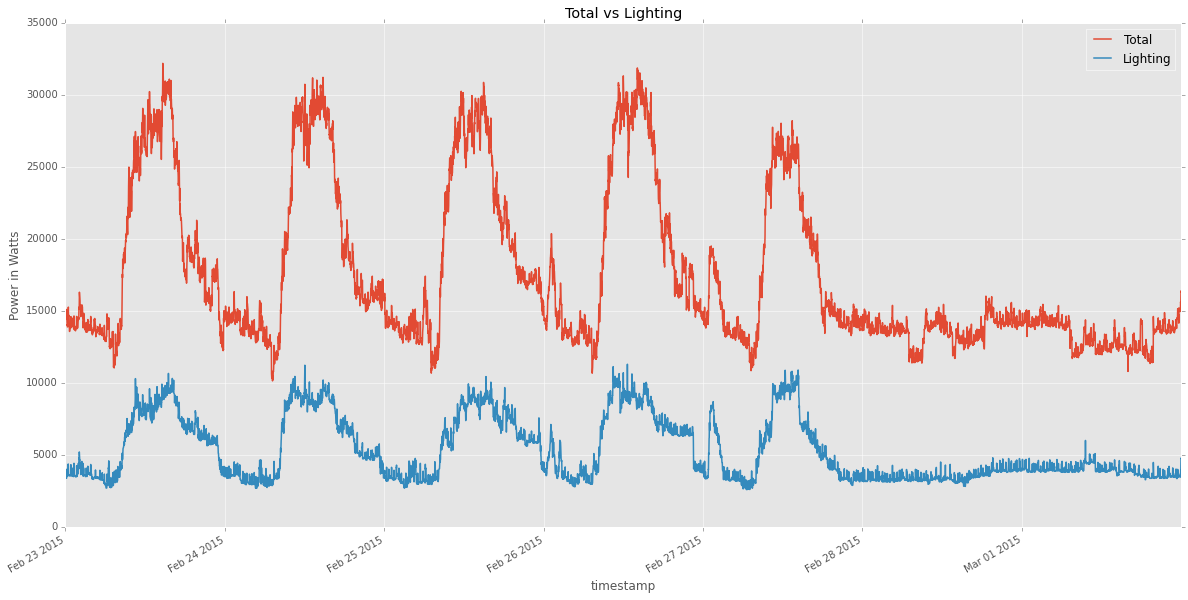

In [81]:
ax=result[['Total','Lighting']].plot(figsize=(20,10),lw=1.5,markersize=15,title='Total vs Lighting')
ax.set_ylabel('Power in Watts')

### Interactive Plots:

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go

In [39]:
trace1 = go.Scatter(
    x = result.index,
    y = result.Lighting.values,
    name = 'Lighting',
    
        line = dict(
        color=('rgb(204, 204, 204,0.1)'),width = 1.5,)
)
trace2 = go.Scatter(
    x = result.index,
    y = result.Total.values,
    name = 'Total',
    line = dict(
        color = ('rgb(102, 102, 102)'),width = 1.5,)
)
layout=dict(title = 'Interactive profile',xaxis=dict(title='Time'),yaxis=dict(title='Watts'),)

data = [trace1,trace2]
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='1.A')

In [40]:
trace=[]
for k,i in enumerate(result.columns[1:]):
    trace.append(go.Scatter(
    x = result.index,
    y = result[i].values,
    name = i,
    line = dict(
    color = ('rgb(102+k, 102+k, 102+k)'),width = 1.2,)
        )
                )
    

layout=dict(title = 'Interactive profile',xaxis=dict(title='Time'),yaxis=dict(title='Watts'),)

data = trace
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='1.B')

The draw time for this plot will be slow for all clients.


/Users/narenjhabakh/anaconda/lib/python3.4/site-packages/plotly/plotly/plotly.py:1411: UserWarning:

Estimated Draw Time Too Long

